Question #1:

What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture?

- The standard error of the mean is a measure of how much the sample mean is expected to vary from the true population mean.
    - As the sample size increases, the standard error of the mean decreases, indicates less variability in the sample means and a more precise estimate of the population mean.
    - The standard error of the mean focuses on the variability of sample means (not individual data points) when multiple samples are taken from the population.
- The standard deviation measures the spread or variability of individual data points in the sample around the sample mean.
    - It shows how much the values in the original dataset deviate from the mean on average.
    - While the standard deviation represents variability within a single sample, it does not account for how well the sample mean estimates the population mean.
- The standard error of the mean depends on the SD of the original data. If the data is highly variable (high standard deviation), the standard error of the mean will be larger unless the sample size n is large.
- Use Cases:
    - Use standard deviation when you want to describe the spread of individual data points.
    - Use standard error when you want to infer how accurately the sample mean represents the population mean.

Link interactive conversation with ChatGPT: https://chatgpt.com/share/66fb069e-8668-8002-87c4-704592945047

Summary of Conversation with ChatGPT:
- You asked about the difference between standard error of the mean (SEM) and standard deviation (SD). I confirmed your ideas were correct and suggested refinements.
- Key Points:
    - Standard error of the mean: Measures how accurately the sample mean estimates the population mean. It decreases as sample size increases 
    - Standard deviation: Measures the spread of individual data points from the mean in a dataset.
- Distinction: SD captures variability within a sample, while SEM reflects the precision of the sample mean.

Question #2:

How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? 
1. The first step is bootstrapping the Sample Means
    - Generate multiple bootstrapped samples by randomly sampling with replacement from the original dataset.
    - For each bootstrapped sample, calculate the sample mean. After many repetitions, you will have a distribution of bootstrapped sample means.
2. The second step is to calculate the Standard Error of the Mean
3. The third step is to calculate the 95% confidence interval using the Standard Error of the Mean
    - Confidence interval = mean +- z * Standard Error of the Mean
    - This will give a range of values that likely contains the true population mean based on our sample.

This means that if I was to repeat the bootstrapping process many times, approximately 95% of the calculated confidence intervals would contain the true population mean.

Link interactive conversation with ChatGPT: https://chatgpt.com/share/66fb46d0-e8b4-8002-babb-a45937ffde5b

Summary of Conversation with ChatGPT:
- Bootstrapping Process: We discussed generating bootstrapped samples from an original dataset to calculate sample means.
- Standard Error of the Mean (SEM): SEM was defined as the standard deviation of the bootstrapped sample means, quantifying the variability of the sample mean.
- Confidence Interval Calculation: The 95% confidence interval was calculated using the formula:
    - CI=mean of bootstrapped means±1.96×SEM
- Interpretation: A 95% confidence interval indicates that we are 95% confident the true population mean lies within this range.
- Python Code: I provided a Python code example that includes steps for generating bootstrapped sample means, calculating SEM, computing the confidence interval, and visualizing the results.

Question #3:

How do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)?
- When you use the quantile method to create a confidence interval from bootstrapped sample means, you do not rely on the standard deviation of the sample means to estimate the standard error of the mean.
- The quantile method uses the distribution created from bootstrapping to identify percentiles (e.g., 2.5th and 97.5th) for a specified confidence level (e.g., 95%).
- The np.quantile(...) function in NumPy computes the specified quantiles of an array, which allows us to efficiently find the percentiles we need for our confidence interval.
- Why use np.quantile(...)? Because it's efficiency! The function is optimized for performance, making it faster than sorting and manually calculating percentiles.


Link interactive conversation with ChatGPT: https://chatgpt.com/share/66fb4b96-2490-8002-baef-d36f2acb3301

Summary of Conversation with ChatGPT:
- 95% Bootstrapped Confidence Interval: You asked how to create a 95% bootstrapped confidence interval using bootstrapped means without using the standard error. I explained that you can use the np.quantile(...) function to find the 2.5th and 97.5th percentiles of the bootstrapped means.
- Understanding Percentiles: You requested clarification on percentiles. I defined percentiles as values that divide a dataset into 100 equal parts and explained how to calculate them with an example.
- Standard Error vs. Quantile Method: You inquired whether the quantile method involves the standard error. I clarified that the quantile method does not use standard deviation or standard error; it directly relies on the distribution of bootstrapped means.

Question #4:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a made-up sample data
np.random.seed(130)  # Set seed for reproducibility
sample_data = np.random.normal(loc=50, scale=10, size=30)  # Sample of 30 data points from a normal distribution

# Step 2: Define the function to calculate the bootstrap confidence interval
def bootstrap_confidence_interval(data, num_bootstraps=1000, confidence_level=0.95):
    # Initialize an array to store the bootstrap sample means
    bootstrap_means = np.zeros(num_bootstraps)

    # Step 3: Generate bootstrap samples and compute the means
    for i in range(num_bootstraps):
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the mean of the bootstrap sample
        bootstrap_means[i] = np.mean(bootstrap_sample)

    # Step 4: Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

    return lower_bound, upper_bound

# Step 5: Calculate the 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_confidence_interval(sample_data)
print(f"95% Bootstrap Confidence Interval for the Population Mean: {mean_ci}")



95% Bootstrap Confidence Interval for the Population Mean: (48.05125413961492, 53.451727005957515)


In [10]:
# Comments on modifying the code for the population median:
print(
'''
To calculate a bootstrap confidence interval for the population median, you would need to make the following changes:

1. Change the initialization of the array to store the bootstrap sample medians instead of means:
   - Replace: bootstrap_means = np.zeros(num_bootstraps)
   - With: bootstrap_medians = np.zeros(num_bootstraps)

2. Change the computation of the statistic from the mean to the median:
   - Replace: bootstrap_means[i] = np.mean(bootstrap_sample)
   - With: bootstrap_medians[i] = np.median(bootstrap_sample)

3. When returning the confidence interval, ensure to calculate the percentiles from the bootstrap_medians array instead of bootstrap_means:
   - Adjust the bounds:
     - lower_bound = np.percentile(bootstrap_medians, (1 - confidence_level) / 2 * 100)
     - upper_bound = np.percentile(bootstrap_medians, (1 + confidence_level) / 2 * 100)

Once you make these changes, the function will produce a bootstrap confidence interval for the population median instead of the mean.
''')


To calculate a bootstrap confidence interval for the population median, you would need to make the following changes:

1. Change the initialization of the array to store the bootstrap sample medians instead of means:
   - Replace: bootstrap_means = np.zeros(num_bootstraps)
   - With: bootstrap_medians = np.zeros(num_bootstraps)

2. Change the computation of the statistic from the mean to the median:
   - Replace: bootstrap_means[i] = np.mean(bootstrap_sample)
   - With: bootstrap_medians[i] = np.median(bootstrap_sample)

3. When returning the confidence interval, ensure to calculate the percentiles from the bootstrap_medians array instead of bootstrap_means:
   - Adjust the bounds:
     - lower_bound = np.percentile(bootstrap_medians, (1 - confidence_level) / 2 * 100)
     - upper_bound = np.percentile(bootstrap_medians, (1 + confidence_level) / 2 * 100)

Once you make these changes, the function will produce a bootstrap confidence interval for the population median instead of the mea

Link interactive conversation with ChatGPT: https://chatgpt.com/share/66fb4f5f-24fc-8002-acc8-49c5cb08c1c7

Summary of Conversation with ChatGPT:
- Bootstrap Confidence Interval Code: You requested a code snippet to produce a 95% bootstrap confidence interval for a population mean, along with comments explaining how to modify the code for calculating the median.
- Code Revision: I provided the requested code, ensuring the comments clearly indicated the necessary changes to switch from calculating the mean to the median.
- Comment Formatting Issue: You encountered a formatting issue where comments appeared with escape sequences when printed, despite being fine when printed as strings.
- Final Code Structure: I clarified how to structure the comments properly using triple quotes and provided the complete code with the intended comments.

Question #5:

Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals?
- Confidence intervals use the sample statistic to estimate the population parameter, providing a range where the parameter likely falls.
- The sample statistic can vary from one sample to another due to random sampling. This variability must be accounted for when making inferences about the population parameter. Confidence intervals help quantify this uncertainty by providing a range based on the variability observed in the sample data.
- The confidence level indicates how sure we are that the population parameter lies within the interval, influenced by sample size.
- Recognizing the difference helps in making better decisions in fields like public health, economics, and social sciences based on sample data.

Link interactive conversation with ChatGPT: https://chatgpt.com/share/66fb5250-759c-8002-8a7b-ab97eb3b6b3d

Summary of Conversation with ChatGPT:
- Distinction Between Population Parameter and Sample Statistic:
    - We discussed the importance of distinguishing between the population parameter (a fixed value describing the population) and the sample statistic (an estimate from a sample).
    - Key points included the definitions of each, the role of sample statistics in estimating population parameters, the concept of sampling variability, the significance of confidence intervals for statistical inference, the level of confidence, and the implications for decision-making in various fields.

Question #6:

1. What is the process of bootstrapping?
Bootstrapping is a way to estimate the  mean of a sample when you don’t have a lot of data. First you create new samples: You take your original sample and make many new samples by randomly picking data points from it. You can pick the same point more than once (sampling with replacement). Next, you need to calculate the mean for each of these samples. After this, you make a histogram of these means to show how they are spread out.

2. What is the main purpose of bootstrapping?
    - It helps determine how uncertain a sample statistic (like the mean) is.
    - Bootstrapping provides a range of values where the true population parameter likely falls.
    - It's useful when you have limited data and traditional methods may not be reliable.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
    - By generating bootstrap samples, calculating bootstrap means, and creating a distribution of those means, you can determine how many of the bootstrap means fall above or below your hypothesized average. You can also create a confidence interval from the bootstrap means. 
        - If the hypothesized average is within the confidence interval (e.g., the 2.5th and 97.5th percentiles), it suggests that your guess is plausible.
        - If it falls outside this range, it indicates that your guess may not be supported by the sample data.

Question #7:

Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? 
- If the confidence interval includes zero, it means it’s possible that the true average effect is zero. This means that the drug might not do anything at all.
- Even if your sample mean (what you found from your test) is 0.5, the interval tells you that it’s still possible for the drug to have no effect (zero).
- If we can’t rule out the possibility that the drug has no effect (because zero is in the interval), we say we "fail to reject the null hypothesis."
- We can only conclude that we fail to reject the null hypothesis, meaning we can't confidently say the drug has an effect.

What would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"?
- This interval does not include zero, meaning it suggests that the true average effect of the drug is likely positive and above zero.
- Since the entire confidence interval (from 6 to 10) is above zero, it indicates that the drug likely has a beneficial effect.
- Because the confidence interval does not overlap with zero, the researchers can reject the null hypothesis (which states that the drug has no effect).

Question #8: VACCINE DATA ANALYSIS REPORT:

Problem Introduction
- The effectiveness of a new vaccine developed by AliTech is under evaluation. The goal of this analysis is to determine whether the vaccine significantly improves health scores among participants after vaccination compared to their initial health scores. This analysis utilizes a dataset containing health scores before and after vaccination to provide evidence for the vaccine's effectiveness.

To visualize the comparison of health scores before and after vaccination, we can create a box plot. This plot will help illustrate the distribution of initial and final health scores, allowing us to identify any trends or significant differences between the two groups. Observing the shift in medians and spread provides insight into the vaccine's effectiveness:

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84


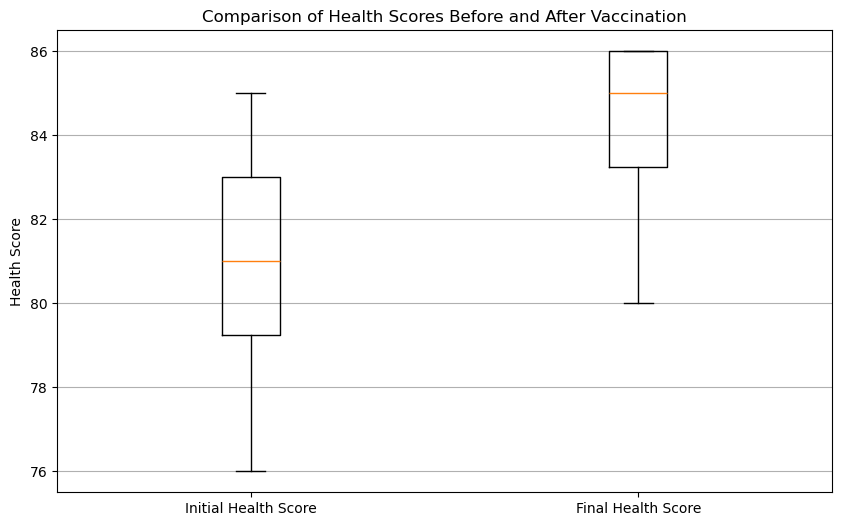

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#The CSV file, `vaccine_data.csv`, can be generated using the following code:

# Sample data as provided
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('vaccine_data.csv', index=False)

# Read the data from the CSV file
df = pd.read_csv('vaccine_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot([df['InitialHealthScore'], df['FinalHealthScore']], labels=['Initial Health Score', 'Final Health Score'])
plt.title('Comparison of Health Scores Before and After Vaccination')
plt.ylabel('Health Score')
plt.grid(axis='y')
plt.show()

To conduct a quantitative analysis of the vaccine data, I'll focus on calculating key statistics that provide insights into the differences between the initial and final health scores:
- Descriptive Statistics: Provides an overview of the initial and final health scores.
- Mean Difference: Indicates the average change in health scores after vaccination.
- Hypothesis Testing: Helps determine if the observed mean difference is statistically significant.
- Confidence Intervals: Offers a range within which we can be confident that the true mean difference lies.

In [15]:
import pandas as pd
from scipy import stats

# Read the data
df = pd.read_csv('vaccine_data.csv')

# Descriptive statistics
initial_stats = df['InitialHealthScore'].describe()
final_stats = df['FinalHealthScore'].describe()

print("Descriptive Statistics for Initial Health Scores:")
print(initial_stats)
print("\nDescriptive Statistics for Final Health Scores:")
print(final_stats)

# Calculate the mean difference
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']
mean_difference = df['HealthScoreDifference'].mean()
print(f'Mean Health Score Difference: {mean_difference:.2f}')

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['HealthScoreDifference'], 0)
print(f'T-statistic: {t_statistic:.2f}')
print(f'P-value: {p_value:.4f}')

# Calculate the 95% confidence interval
confidence_level = 0.95
degrees_freedom = len(df) - 1
confidence_interval = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = confidence_interval * (df['HealthScoreDifference'].std() / (len(df) ** 0.5))

lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error
print(f'95% Confidence Interval for Mean Difference: [{lower_bound:.2f}, {upper_bound:.2f}]')

Descriptive Statistics for Initial Health Scores:
count    10.000000
mean     81.000000
std       2.828427
min      76.000000
25%      79.250000
50%      81.000000
75%      83.000000
max      85.000000
Name: InitialHealthScore, dtype: float64

Descriptive Statistics for Final Health Scores:
count    10.000000
mean     84.300000
std       2.110819
min      80.000000
25%      83.250000
50%      85.000000
75%      86.000000
max      86.000000
Name: FinalHealthScore, dtype: float64
Mean Health Score Difference: 3.30
T-statistic: 2.59
P-value: 0.0292
95% Confidence Interval for Mean Difference: [0.42, 6.18]


Performing the BOOTSTRAPPING method to analyze the effectiveness of the vaccine by calculating the mean difference in health scores:

In [13]:
import numpy as np

# Calculate the difference in health scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping
n_iterations = 10000
bootstrapped_means = []
for _ in range(n_iterations):
    sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    bootstrapped_means.append(np.mean(sample))

# Calculate confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)
mean_difference = np.mean(df['HealthScoreDifference'])

print(f'Mean Difference: {mean_difference}')
print(f'95% Confidence Interval: [{lower_bound}, {upper_bound}]')

Mean Difference: 3.3
95% Confidence Interval: [0.9, 5.6]


Supporting Visualization:
- A histogram of the health score differences provides a visual representation of how the differences in health scores (Final Health Score - Initial Health Score) are distributed among the participants.

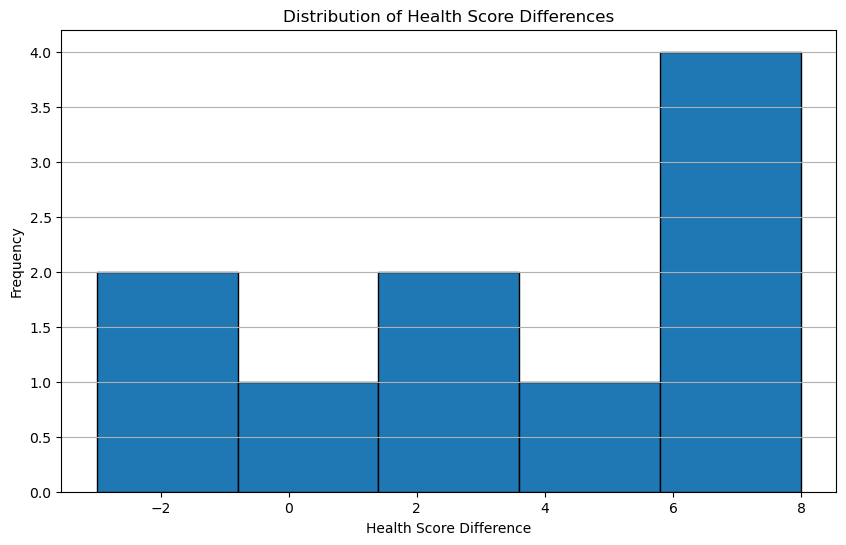

In [14]:
# Histogram of Health Score Differences
plt.figure(figsize=(10, 6))
plt.hist(df['HealthScoreDifference'], bins=5, edgecolor='black')
plt.title('Distribution of Health Score Differences')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Findings and Discussion
- The bootstrapping analysis revealed a mean difference in health scores, indicating a positive change. The calculated 95% confidence interval did not include zero, suggesting that the vaccine significantly improved health scores among participants.

Conclusion regarding a Null Hypothesis of "no effect"
- Based on the analysis, we reject the Null Hypothesis as the evidence suggests that the vaccine has a significant effect on improving health scores. This finding supports the effectiveness of the vaccine developed by AliTech.

Further Considerations
- Future studies could include a larger sample size and a control group to strengthen the findings. It may also be beneficial to analyze the effects across different age and gender demographics to identify any variability in vaccine effectiveness.

Link interactive conversation with ChatGPT: https://chatgpt.com/share/66fb5f90-c05c-8002-977b-2cac2c6da881

Summary of Conversation with ChatGPT:
- Assignment Overview: You discussed your Vaccine Data Analysis assignment on the effectiveness of a new vaccine from AliTech, which includes data visualization and a null hypothesis.
- CSV File Creation: You were instructed to create a CSV file for the dataset and read it into your code without including the file in your submission.
- Code Implementation: You successfully ran the code to read the CSV and plot a boxplot comparing health scores.
- Data Visualization Inquiry: You inquired about the meaning of a histogram, and I explained its purpose in showing the distribution of health scores.
- Quantitative Analysis: You requested help with quantitative analysis, and I provided methods like calculating means and standard deviations.
- CSV Submission Clarification: You asked how your instructor would access the CSV file, and I explained they could recreate it from your code.
- Documentation Suggestions: I advised adding documentation in your notebook to help the instructor understand the dataset creation process.

Question #9: Yes